# `健診データによる肝疾患判定`

## `概要`

### 健診データを使用して肝疾患の有無を判定する

## `評価方法`
### 評価関数「AUC(Area Under the Curve)」を使用する

## `説明変数・目的変数`

+ Age

+ Gender

+ T_Bil（総ビリルビン）

+ D_Bil(直接ビリルビン)

+ ALP(アルカリフォスファターゼ)

+ ALT_GPT(アラニンアミノトランスフェラーゼ)

+ AST_GOT(アスパラギン酸アミノトランスフェラーゼ)

+ TP(総タンパク質)

+ Alb(アルブミン)

+ AG_ratio(アルブミン/グロブリン比)

+ disease ：　肝疾患の有無（0:無, 1:有）

---

In [836]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import math
import japanize_matplotlib

train = pd.read_csv("train.csv", sep=",")
test = pd.read_csv("test.csv", sep=",")
data = pd.concat([train,test], axis=0)

In [837]:
pd.set_option('display.max_columns', 100)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5000 non-null   int64  
 1   Age       5000 non-null   int64  
 2   Gender    5000 non-null   object 
 3   T_Bil     5000 non-null   float64
 4   D_Bil     5000 non-null   float64
 5   ALP       5000 non-null   float64
 6   ALT_GPT   5000 non-null   float64
 7   AST_GOT   5000 non-null   float64
 8   TP        5000 non-null   float64
 9   Alb       5000 non-null   float64
 10  AG_ratio  5000 non-null   float64
 11  disease   3500 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 507.8+ KB


In [280]:
#sns.pairplot(train)

---
## Age

In [238]:
train.Age.unique()

array([42, 65, 29, 59, 53, 48, 18, 44, 62, 21, 60, 30, 34, 12, 54, 32, 49,
       36, 43, 37, 57, 28, 33, 20, 55, 31, 58, 19, 13, 61, 41, 27, 64, 50,
       26, 51, 17, 16, 45, 74, 63, 40, 71,  7, 24,  6, 47, 39, 38, 52, 14,
        3, 72, 69, 25, 70, 56, 23, 75, 22,  9, 35, 46, 68])

In [838]:
# 年齢が負の時、正に直す
def abs_age(data):
    data['Age'] = abs(data['Age'])
abs_age(train)
abs_age(test)

In [839]:
# 年齢グループにする
def age_group(data):
    data['age_group'] = np.nan
    
    for i in range(len(data)):
        if (data['Age'][i]>=0) & (data['Age'][i]<=9):
            data['age_group'][i] = 0
        if (data['Age'][i]>=10) & (data['Age'][i]<=19):
            data['age_group'][i] = 1
        if (data['Age'][i]>=20) & (data['Age'][i]<=29):
            data['age_group'][i] = 2
        if (data['Age'][i]>=30) & (data['Age'][i]<=39):
            data['age_group'][i] = 3
        if (data['Age'][i]>=40) & (data['Age'][i]<=49):
            data['age_group'][i] = 4
        if (data['Age'][i]>=50) & (data['Age'][i]<=59):
            data['age_group'][i] = 5
        if (data['Age'][i]>=60) & (data['Age'][i]<=69):
            data['age_group'][i] = 6
        if (data['Age'][i]>=70) & (data['Age'][i]<=79):
            data['age_group'][i] = 7
        if (data['Age'][i]>=80):
            data['age_group'][i] = 8

age_group(train)
age_group(test)

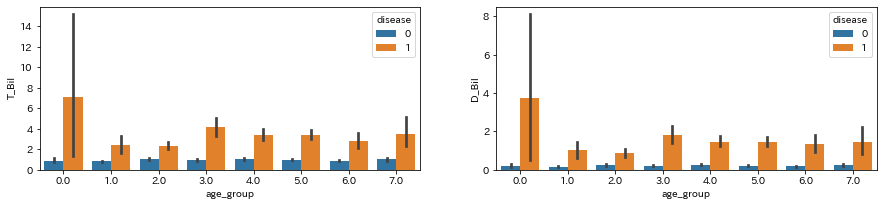

In [840]:
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
sns.barplot(train['age_group'], train['T_Bil'], hue=train['disease'])
plt.subplot(1, 2, 2)
sns.barplot(train['age_group'], train['D_Bil'], hue=train['disease'])
plt.show()

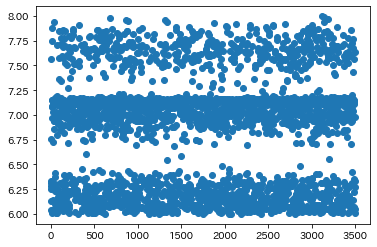

In [841]:
plt.scatter(train.id[(train.TP<=8)&(train.TP>=6)], train.TP[(train.TP<=8)&(train.TP>=6)])

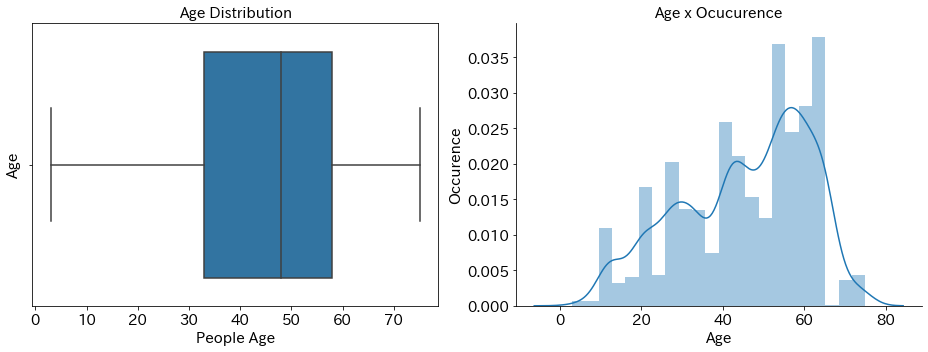

In [842]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['Age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [843]:
# Quartiles
print('1º Quartile: ', train['Age'].quantile(q = 0.25))
print('2º Quartile: ', train['Age'].quantile(q = 0.50))
print('3º Quartile: ', train['Age'].quantile(q = 0.75))
print('4º Quartile: ', train['Age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', train['Age'].quantile(q = 0.75) + 
                      1.5*(train['Age'].quantile(q = 0.75) - train['Age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  48.0
3º Quartile:  58.0
4º Quartile:  75.0
Ages above:  95.5 are outliers


In [844]:
# 年齢グループにする
def age_group2(data):
    data['age_group2'] = np.nan
    
    for i in range(len(data)):
        if (data['Age'][i]>=0) & (data['Age'][i]<=33):
            data['age_group2'][i] = 0
        if (data['Age'][i]>=34) & (data['Age'][i]<=48):
            data['age_group2'][i] = 1
        if (data['Age'][i]>=49) & (data['Age'][i]<=58):
            data['age_group2'][i] = 2
        if (data['Age'][i]>=59) & (data['Age'][i]<=75):
            data['age_group2'][i] = 3
        if (data['Age'][i]>=76):
            data['age_group2'][i] = 4

age_group2(train)
age_group2(test)

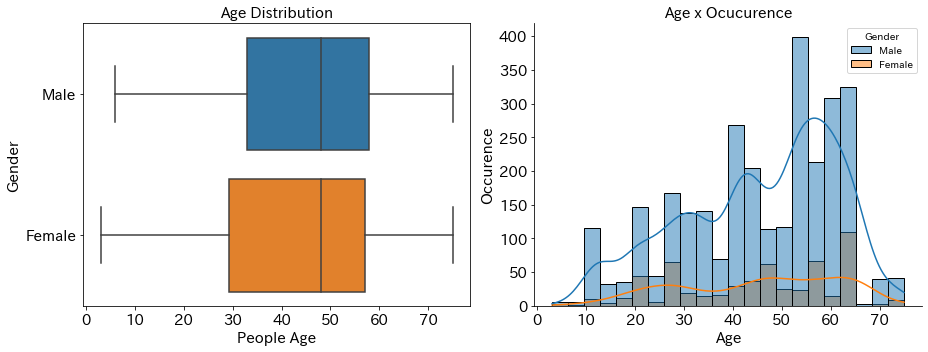

In [845]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Age', y='Gender', data = train, ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Gender', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.histplot(data=train, x='Age', hue='Gender', kde=True, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [846]:
# Quartiles
print('1º Quartile: ', train[train['Gender']=='Male'].Age.quantile(q = 0.25))
print('2º Quartile: ', train[train['Gender']=='Male'].Age.quantile(q = 0.50))
print('3º Quartile: ', train[train['Gender']=='Male'].Age.quantile(q = 0.75))
print('4º Quartile: ', train[train['Gender']=='Male'].Age.quantile(q = 1.00))

print('1º Quartile: ', train[train['Gender']=='Female'].Age.quantile(q = 0.25))
print('2º Quartile: ', train[train['Gender']=='Female'].Age.quantile(q = 0.50))
print('3º Quartile: ', train[train['Gender']=='Female'].Age.quantile(q = 0.75))
print('4º Quartile: ', train[train['Gender']=='Female'].Age.quantile(q = 1.00))


#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', train['Age'].quantile(q = 0.75) + 
                      1.5*(train['Age'].quantile(q = 0.75) - train['Age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  48.0
3º Quartile:  58.0
4º Quartile:  75.0
1º Quartile:  29.25
2º Quartile:  48.0
3º Quartile:  57.0
4º Quartile:  75.0
Ages above:  95.5 are outliers


---
### ①肝細胞内の酵素である`ALT(GPT)`,`AST(GOT)`の著明な上昇がある場合は肝疾患の可能性

### ②黄疸の指標となるビリルビン値が上昇 (総ビリルビン　＝　直接ビリルビン　＋　間接ビリルビン)

### url:https://www.harasanshin.or.jp/medical/shokaki/kanzoshikkantowa.html

In [847]:
# 間接ビリルビン特徴量作成
def indirect_column(data):
    data['I_Bil'] = np.nan
    
    data['I_Bil'] = data['T_Bil'] - data['D_Bil']
    
indirect_column(train)
indirect_column(test)
indirect_column(data)

(0.0, 200.0)

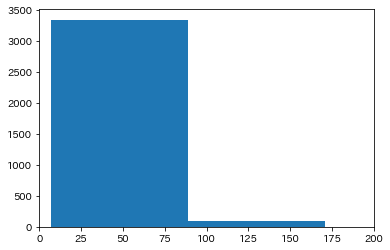

In [848]:
plt.hist(train['ALT_GPT'], bins=20)
plt.xlim(0,200)

In [849]:
train[(train['ALT_GPT']>=1000)&(train['disease']==1)]

,id,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,age_group,age_group2,I_Bil
30,30,55,Male,13.105897,7.354057,179.800155,1460.478575,299.234004,5.075781,4.365000,0.807832,1,5.0,2.0,5.751840
95,95,34,Male,0.675943,0.239887,192.687429,1451.984983,248.743611,5.079304,3.970796,1.092026,1,3.0,1.0,0.436056
320,320,34,Male,4.753098,2.799715,323.866701,1518.067311,416.580096,6.870305,2.965487,0.849852,1,3.0,1.0,1.953384
445,445,41,Male,0.899139,7.492845,186.186340,1468.759685,271.319088,5.137764,3.039802,1.026950,1,4.0,1.0,-6.593706
801,801,55,Male,12.321281,6.477505,192.664117,1501.479451,208.009181,5.180736,2.985601,0.751536,1,5.0,2.0,5.843777
956,956,9,Male,5.429291,3.664280,289.290696,1562.722501,463.517006,5.082471,4.340453,1.092596,1,0.0,0.0,1.765010
1585,1585,21,Male,4.603251,0.212492,197.403346,1645.254290,236.680209,6.926952,3.479188,0.756676,1,2.0,0.0,4.390759
1764,1764,17,Male,3.667284,2.983766,203.906975,1494.495933,396.787100,5.165714,2.985946,0.770246,1,1.0,0.0,0.683518
1889,1889,48,Male,11.553073,7.654158,167.709886,1417.455361,329.364460,4.996537,4.427338,1.056448,1,4.0,1.0,3.898916
2193,2193,55,Male,14.372262,7.248510,192.334406,1536.705645,228.925811,5.133881,3.052192,0.781816,1,5.0,2.0,7.123752


---
### T_Bil(総ビリルビン) : 基準値は0.2~1.2

### url : https://www.kanen-net.info/kanennet/knowledge/inspection09

In [850]:
# T_Bil : ~1.2は0、それ以外は1
def tb_standard(data):
    data['TB_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['T_Bil'][i]<=1.2):
            data['TB_standard'][i] = 0
        else:
            data['TB_standard'][i] = 1

tb_standard(train)
tb_standard(test)

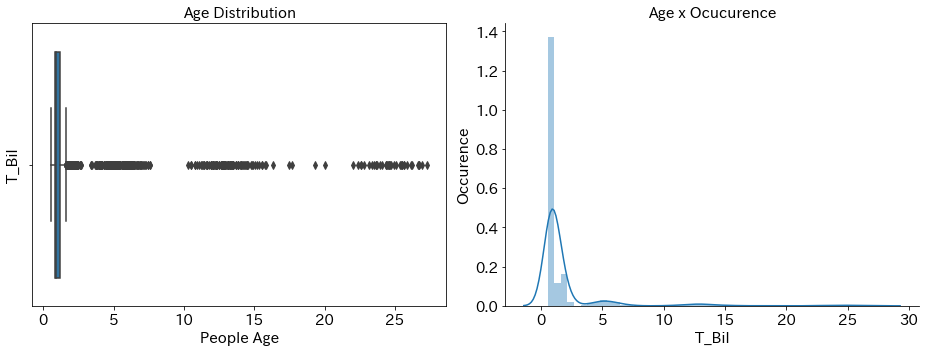

In [851]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'T_Bil', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('T_Bil', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['T_Bil'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('T_Bil', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

---
### D_Bil(直接ビリルビン) : 基準値は0.1~0.5

### url : https://www.kanen-net.info/kanennet/knowledge/inspection09

In [852]:
# D_Bil : ~0.5は0、それ以外は1
def db_standard(data):
    data['DB_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['D_Bil'][i]<=0.5):
            data['DB_standard'][i] = 0
        else:
            data['DB_standard'][i] = 1

db_standard(train)
db_standard(test)

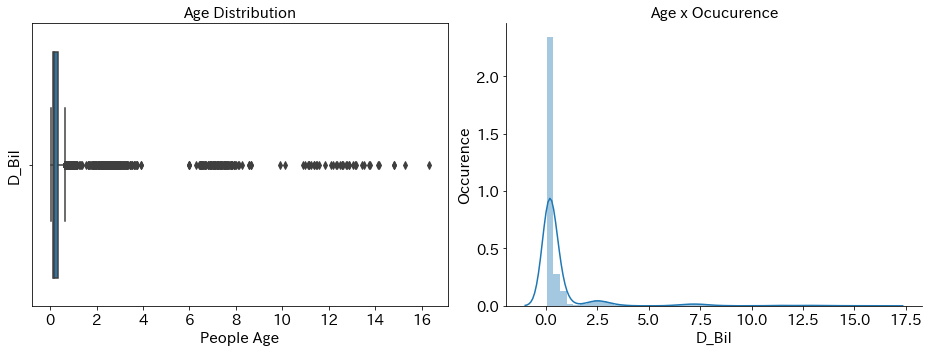

In [853]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'D_Bil', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('D_Bil', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['D_Bil'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('D_Bil', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

---
### ID_Bil(間接ビリルビン) : 基準値は~0.5

### url : https://www.kanen-net.info/kanennet/knowledge/inspection09

In [854]:
# ID_Bil : ~0.5は0、それ以外は1
def id_standard(data):
    data['IB_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['I_Bil'][i]<=0.5):
            data['IB_standard'][i] = 0
        else:
            data['IB_standard'][i] = 1

id_standard(train)
id_standard(test)

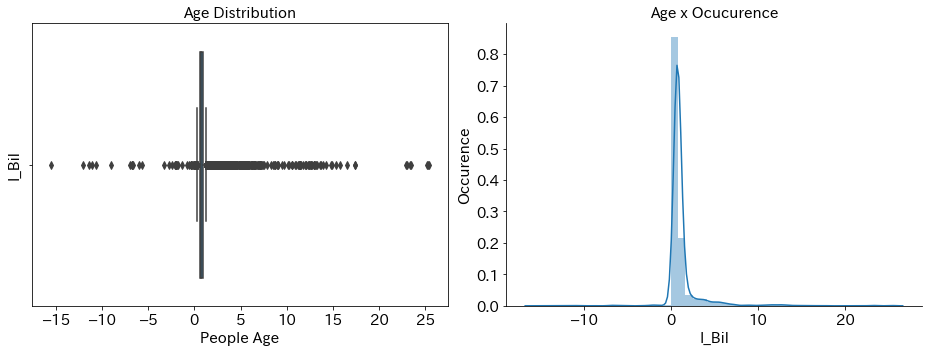

In [855]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'I_Bil', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('I_Bil', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['I_Bil'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('I_Bil', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

---
### ALP(アルカリフォスファターゼ) : 基準値は80~260

### url : https://dock.cocokarada.jp/check/b04_04.html

In [856]:
# ALP : ~260は0、それ以外は1
def alp_standard(data):
    data['ALP_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['ALP'][i]<=260):
            data['ALP_standard'][i] = 0
        else:
            data['ALP_standard'][i] = 1

alp_standard(train)
alp_standard(test)

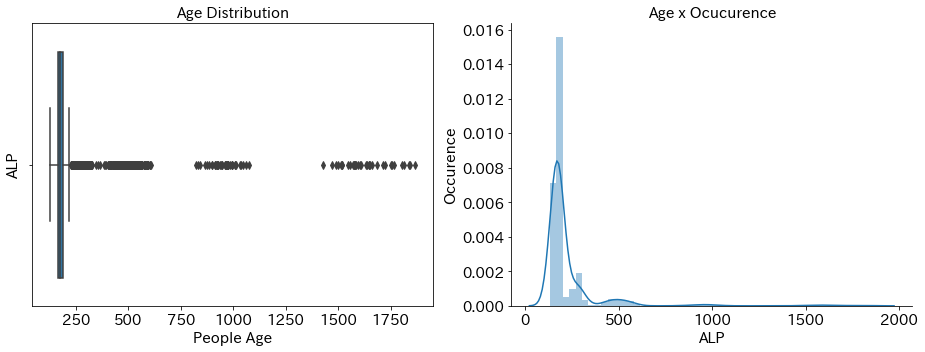

In [857]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'ALP', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('ALP', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['ALP'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('ALP', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

+ ALPは女性より男性の方がやや高く、小児は成人よりも高い数値（特に、乳幼児期と10~12,3頃）

+ url : http://www.jrcla.or.jp/kensanohanashi/img/1h27-h28.pdf

In [858]:
train[(train.Age<=6) | ((train.Age>=9) & (train.Age<=13))].mean()

id              1611.457143
Age               11.678571
T_Bil              1.326218
D_Bil              0.444386
ALP              259.172870
ALT_GPT           32.819917
AST_GOT           36.362199
TP                 6.788207
Alb                3.871787
AG_ratio           0.902142
disease            0.357143
age_group          0.942857
age_group2         0.000000
I_Bil              0.881832
TB_standard        0.078571
DB_standard        0.042857
IB_standard        0.957143
ALP_standard       0.642857
dtype: float64

---
### ALT_GPT(アラニンアミノトランスフェラーゼ) : 基準値は5~45

### url : https://www.seikatsu-kojo.jp/entry/health/rinken/alt

In [859]:
# ALT : ~45は0、それ以外は1
def alt_standard(data):
    data['ALT_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['ALT_GPT'][i]<=45):
            data['ALT_standard'][i] = 0
        else:
            data['ALT_standard'][i] = 1

alt_standard(train)
alt_standard(test)

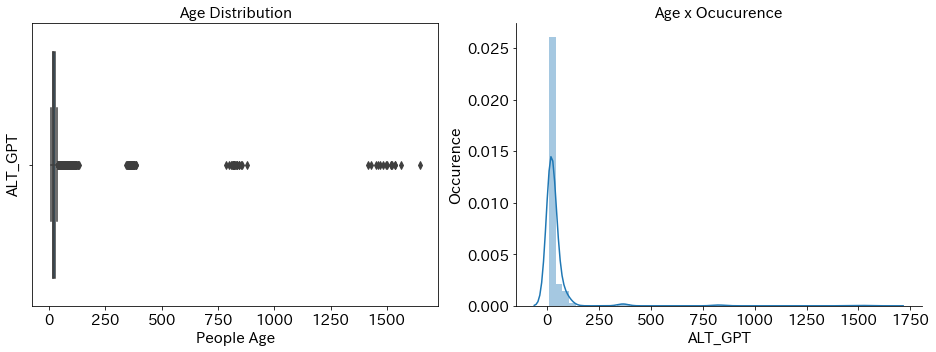

In [860]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'ALT_GPT', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('ALT_GPT', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['ALT_GPT'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('ALT_GPT', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

---
### AST_GOT( アスパラギン酸アミノトランスフェラーゼ ) : 基準値は5~40

### url : https://www.seikatsu-kojo.jp/entry/health/rinken/alt

In [861]:
# AST : ~40は0、それ以外は1
def ast_standard(data):
    data['AST_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['AST_GOT'][i]<=40):
            data['AST_standard'][i] = 0
        else:
            data['AST_standard'][i] = 1

ast_standard(train)
ast_standard(test)

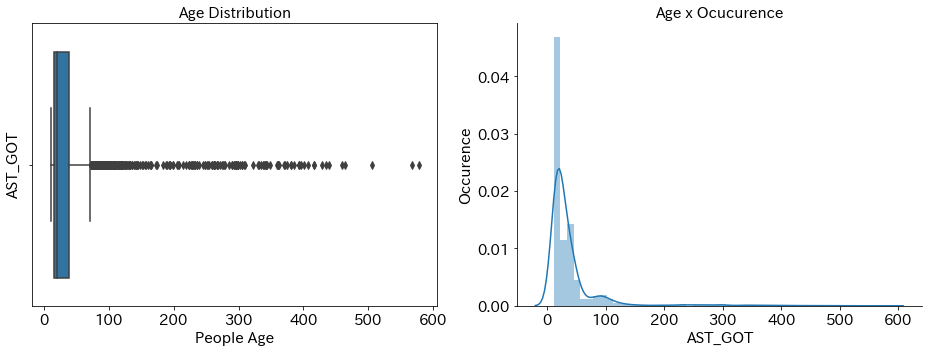

In [862]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'AST_GOT', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('AST_GOT', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train['AST_GOT'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('AST_GOT', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

---
### TP(総タンパク質) : 基準値は6.5~8.2

### url : https://www.kanen-net.info/kanennet/knowledge/inspection02

In [863]:
# tp : 6.5~8.2は0、それ以外は1
def tp_standard(data):
    data['TP_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['TP'][i]>=6.5) & (data['TP'][i]<=8.2):
            data['TP_standard'][i] = 0
        else:
            data['TP_standard'][i] = 1

tp_standard(train)
tp_standard(test)

---
### Alb(アルブミン) : 基準値は3.9~4.9

### url : https://www.kanen-net.info/kanennet/knowledge/inspection03

In [864]:
# Alb : 3.9~4.9は0、それ以外は1
def alb_standard(data):
    data['Alb_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['Alb'][i]>=1.2) & (data['Alb'][i]<=2.0):
            data['Alb_standard'][i] = 0
        else:
            data['Alb_standard'][i] = 1

alb_standard(train)
alb_standard(test)

---
### A/G比 : 健康状態は1以上、肝臓に病気がある場合は1以下 , 基準値は1.2~2.0

### url : https://www.kanen-net.info/kanennet/knowledge/inspection03

In [865]:
# A/G比 : 1.2~2.0は0、それ以外は1
def ag_standard(data):
    data['AG_standard'] = np.nan
    
    for i in range(len(data)):
        if (data['AG_ratio'][i]>=1.2) & (data['AG_ratio'][i]<=2.0):
            data['AG_standard'][i] = 0
        else:
            data['AG_standard'][i] = 1

ag_standard(train)
ag_standard(test)

---
### グロブリン = Alb / (A/G)

### url : https://www.kanen-net.info/kanennet/knowledge/inspection03

In [866]:
def glb(data):
    data['Glb'] = np.nan
    
    data['Glb'] = data['Alb'] / data['AG_ratio']
    
glb(train)
glb(test)

---
### AST/ALT　比 : どちらが高いかが一つの目安

### url : https://www.cick.jp/column/archives/458#outline__4_2

In [867]:
def ast_alt(data):
    data['ST_ratio'] = np.nan
    
    data['ST_ratio'] = data['AST_GOT'] / data['ALT_GPT']

ast_alt(train)
ast_alt(test)

---
### ルート処理

In [868]:
def columns_root(data, target_columns):
    
    for column in target_columns:
        column_log = column+'_root'
        data[column_log] = np.nan
        data[column_log] = data[column] ** 0.5


target_columns = ['T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio', 'ST_ratio', 'Glb']
columns_root(train, target_columns)
columns_root(test, target_columns)

---
### FIB-4 index : (年齢 ✖️ AST) / (血小板 ✖️ √ALT)

### url : https://kanzo-kensa.com/examination/calc/

In [869]:
def fib4(data):
    data['FIB'] = np.nan
    
    data['FIB'] = (data['Age'] * data['AST_GOT']) / (data['ALT_GPT_root'])

fib4(train)
fib4(test)

In [870]:
train['FIB_root'] = train['FIB'] ** 0.5
test['FIB_root'] = test['FIB'] ** 0.5

---
### 対数変換処理

In [871]:
def columns_log(data, target_columns):
    
    for column in target_columns:
        column_log = column+'_log'
        data[column_log] = np.nan
        data[column_log] = np.log10(data[column]+1)


target_columns = ['T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio', 'FIB', 'ST_ratio', 'Glb']
columns_log(train, target_columns)
columns_log(test, target_columns)

---
### アルコール性肝障害の特徴

+ ①ASTとALTの比が2以上となる

+ ②上昇したとしてもASTは500まで、ALTは300までと中等度にとどまる

+ ③ALPは正常上限の3倍までにとどまる

In [872]:
train[(train['AST_GOT']>=40)&(train['AST_GOT']<=500)&(train['ALT_GPT']<=45)&(train['ALT_GPT']<=300)].disease.value_counts()

1    242
0    169
Name: disease, dtype: int64

+ あまり差異は見られなさそう

---
### 複数変数の掛け合わせ

In [873]:
# Age * 各特徴量

import itertools
def multiplication(data, target_columns):    
    for i in data.columns:
        for num,j in enumerate(data.columns):
            multi_columns = i + '_' + j
            data[multi_columns] = np.nan
            data[multi_columns] = data[i] * data[j]
            if num == len(data.columns):
                break
        break

target_columns = ['Age', 'T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio']   
df_train = train[target_columns]
df_test = test[target_columns]
multiplication(df_train, target_columns)
multiplication(df_test, target_columns)

train = pd.merge(train, df_train, how='left')
test = pd.merge(test, df_test, how='left')

In [874]:
# Age + 各特徴量

import itertools
def multiplication(data, target_columns):    
    for i in data.columns:
        for num,j in enumerate(data.columns):
            multi_columns = i + '_plus_' + j
            data[multi_columns] = np.nan
            data[multi_columns] = data[i] + data[j]
            if num == len(data.columns):
                break
        break

target_columns = ['Age', 'T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio']   
df_train = train[target_columns]
df_test = test[target_columns]
multiplication(df_train, target_columns)
multiplication(df_test, target_columns)

train = pd.merge(train, df_train, how='left')
test = pd.merge(test, df_test, how='left')

In [875]:
# Age - 各特徴量

import itertools
def multiplication(data, target_columns):    
    for i in data.columns:
        for num,j in enumerate(data.columns):
            multi_columns = i + '_minus_' + j
            data[multi_columns] = np.nan
            data[multi_columns] = data[i] + data[j]
            if num == len(data.columns):
                break
        break

target_columns = ['Age', 'T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio']   
df_train = train[target_columns]
df_test = test[target_columns]
multiplication(df_train, target_columns)
multiplication(df_test, target_columns)

train = pd.merge(train, df_train, how='left')
test = pd.merge(test, df_test, how='left')

In [876]:
# Age / 各特徴量

import itertools
def multiplication(data, target_columns):    
    for i in data.columns:
        for num,j in enumerate(data.columns):
            multi_columns = i + '_div_' + j
            data[multi_columns] = np.nan
            data[multi_columns] = data[i] + data[j]
            if num == len(data.columns):
                break
        break

target_columns = ['Age', 'T_Bil', 'D_Bil', 'I_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio']   
df_train = train[target_columns]
df_test = test[target_columns]
multiplication(df_train, target_columns)
multiplication(df_test, target_columns)

train = pd.merge(train, df_train, how='left')
test = pd.merge(test, df_test, how='left')

---
### 性別ごとの各特徴量の平均値・最大値・最小値

In [877]:
from copy import deepcopy
from xfeat import SelectCategorical, LabelEncoder, Pipeline, ConcatCombination, SelectNumerical, \
    ArithmeticCombinations, TargetEncoder, aggregation, GBDTFeatureSelector, GBDTFeatureExplorer

aggregated_train = deepcopy(train)
aggregated_test = deepcopy(test)
aggregated_train, aggregated_cols = aggregation(train,
                         group_key="Gender",
                         group_values=["Age"],
                         agg_methods=["mean", "max", 'min']
                         )
aggregated_test, aggregated_cols = aggregation(test,
                         group_key="Gender",
                         group_values=["Age"],
                         agg_methods=["mean", "max", 'min']
                         )
cols_to_show = ["Gender"] + aggregated_cols

train = pd.merge(train, aggregated_train, how='left')
test = pd.merge(test, aggregated_test, how='left')

---
### モデル作成

### LightGBM

In [878]:
# idカラムの削除
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [879]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 性別:カテゴリカル変数
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')
categorical_features = ['Gender']

# 学習データ
X = train.drop(['disease'], axis=1)
y = train['disease']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
lgb_train = lgb.Dataset(X_train, y_train,
                        categorical_feature=categorical_features,
                        free_raw_data=False)
# 検証用
lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train,
                       categorical_feature=categorical_features,
                       free_raw_data=False)

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'boosting_type': 'gbdt',        # 勾配ブースティング
          'objective': 'binary',      # 目的関数：多値分類、マルチクラス分類
          'metric': 'auc',      # 分類モデルの性能を測る指標
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'min_data_in_leaf': 1,          # データの最小数（初期値20）
          #'num_leaves':31,
          'verbosity': -1,                # Fatal の場合出力
         }

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = lgb.train(params,                                   # 上記で設定したパラメータ
                  lgb_train,                                # 使用するデータセット
                  num_boost_round=10000,                     # 学習の回数
                  valid_names=['train', 'valid'],           # 学習経過で表示する名称
                  valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                  #valid_sets=lgb_eval,
                  evals_result=evaluation_results,          # 学習の経過を保存
                  categorical_feature=categorical_features, # カテゴリー変数を設定
                  early_stopping_rounds=20,                 # アーリーストッピング
                  verbose_eval=100)                          # 学習の経過の表示(100回毎)

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=0)

# Accuracy の計算
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=X.columns, columns=['importance'])
display(importance.sort_values('importance', ascending=False))



# 保存
model.save_model('model.txt')

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


Training until validation scores don't improve for 20 rounds
[100]	train's auc: 0.981604	valid's auc: 0.902736
[200]	train's auc: 0.997348	valid's auc: 0.913749
Early stopping, best iteration is:
[241]	train's auc: 0.998949	valid's auc: 0.916183
accuracy: 0.0


,importance
D_Bil,16695.391378
T_Bil,6830.748425
ALT_GPT,4324.214966
I_Bil,4047.324055
AST_GOT,3318.822525
...,...
Alb_log,0.000000
AG_ratio_log,0.000000
ST_ratio_log,0.000000
Glb_log,0.000000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1080x720 with 0 Axes>

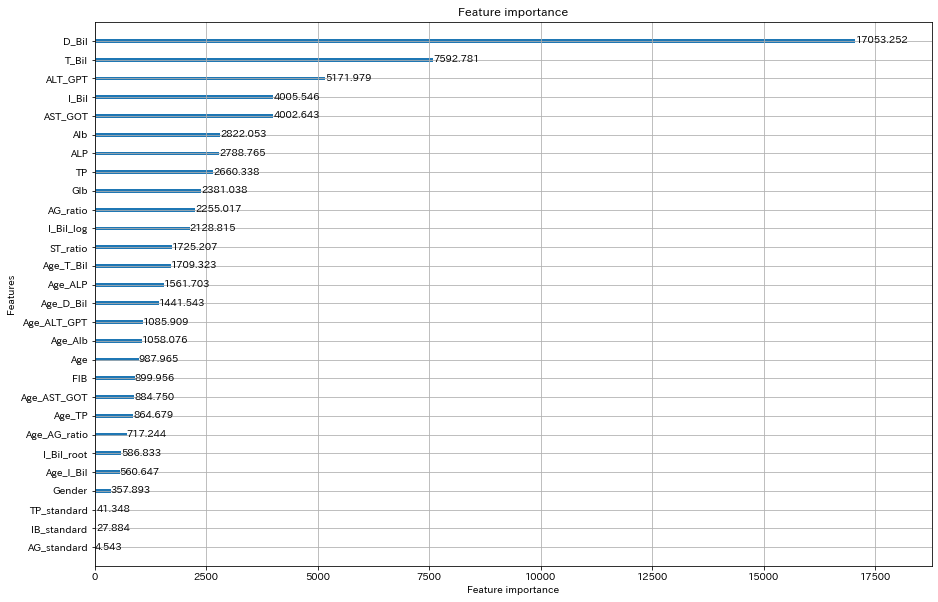

In [790]:
plt.figure(figsize=(15,10))
lgb.plot_importance(model, importance_type='gain', figsize=(15,10))

<AxesSubplot:title={'center':'各特徴量と疾患の有無との相関'}>

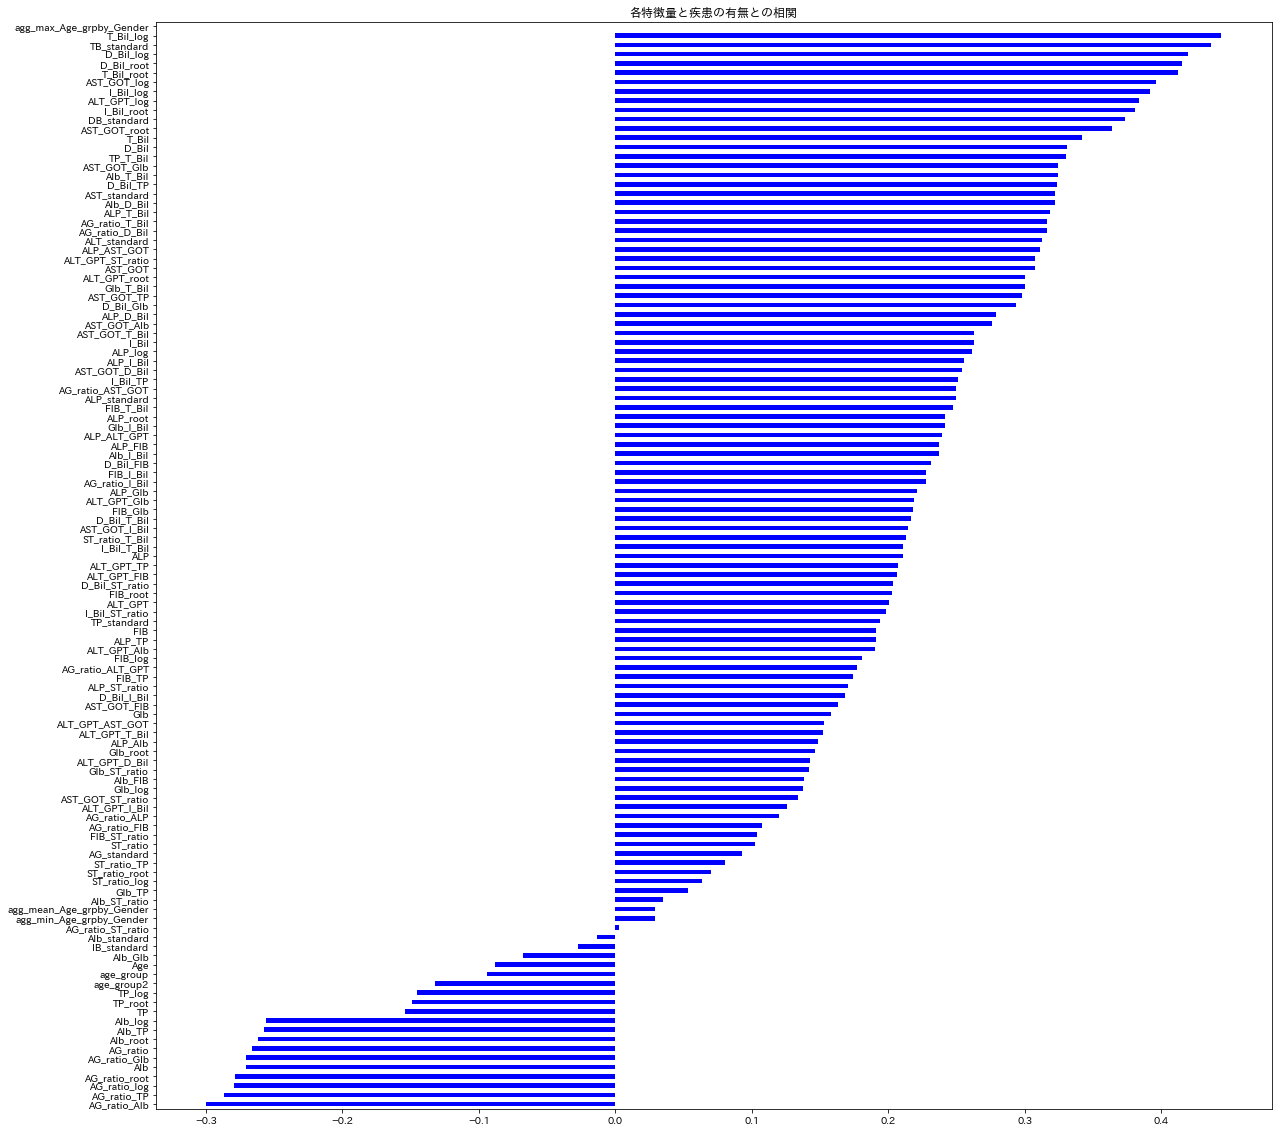

In [232]:
df_corr = X.corrwith(y)
plt.figure(figsize=(20,20))
df_corr.sort_values().plot.barh(color='blue',title='各特徴量と疾患の有無との相関')

---
### youdens indexを使用して閾値を検討

auc:0.9074078751294421


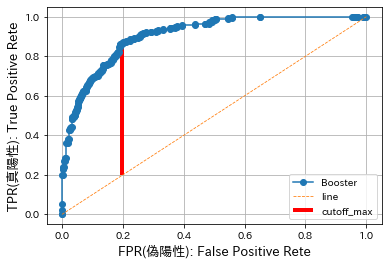

In [464]:
from sklearn.metrics import roc_curve
from sklearn import metrics
#test_predict_wi = result.predict(sm.add_constant(x_test_wi))

model_name = model.__class__.__name__
fpr, tpr, thres = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
# 特異度（真陰性 = 1 - 偽陰性）
sng = 1 - fpr
# Youden indexを用いたカットオフ基準
cutoff_criterion = tpr + sng - 1
print('auc:{}'.format(auc))
plt.plot(fpr, tpr, marker='o', label=model_name)   
x_line = np.linspace(0.0,1.0, 10)
y_line = x_line
plt.plot(x_line, x_line, label='line', ls = '--', linewidth = 0.8)
# 閾値最大の箇所で垂直線を引く
plt.vlines(x=fpr[120], ymin=fpr[120], ymax=tpr[120], color='r', label='cutoff_max', linewidth=4.0)
plt.legend()
plt.grid()
plt.xlabel('FPR(偽陽性): False Positive Rete', fontsize = 13)
plt.ylabel('TPR(真陽性): True Positive Rete', fontsize = 13)
plt.show()

In [465]:
print(cutoff_criterion.max())

# 最大値のインデックス番号をとる
a = pd.DataFrame(cutoff_criterion)
a = a.rename(columns={0: 'value'})
a.query('value==0.6714318187558406')

0.6714318187558406


,value
120,0.671432


In [466]:
print('threshold : {}'.format(thres[120]))

threshold : 0.41358697424198165


In [342]:
# テストデータで予測
y_pred = model.predict(test, num_iteration=model.best_iteration)

df_pred = pd.DataFrame(y_pred,index = range(3500,5000))
df_pred.to_csv("submit_optuna2.csv",header=None)

In [330]:
# テストデータで予測
y_pred = model.predict(test, num_iteration=model.best_iteration)

In [331]:
df_pred = pd.DataFrame(y_pred,index = range(3500,5000))
df_pred.to_csv("submit_multi6.csv",header=None)

---
## optunaを使用してlightGBMモデル作成

In [338]:
import optuna
from sklearn.metrics import roc_auc_score


def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting': 'gbdt',
        'learning_rate': 0.01,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': 0,
        'verbosity': -1,
    }
    gbm = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                    verbose_eval=False, num_boost_round=1000, early_stopping_rounds=100)
    y_prob = gbm.predict(X_test)
    y_pred = np.round(y_prob)
    return roc_auc_score(
        np.round(y_test.values),
        np.round(y_pred)
    )


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-09-10 01:05:36,708] A new study created in memory with name: no-name-84f6addd-a595-4bd2-b716-f153a0bf1e92
[I 2021-09-10 01:05:38,422] Trial 0 finished with value: 0.8352570740619133 and parameters: {'lambda_l1': 1.9698924813125964e-06, 'lambda_l2': 0.0003954973240934655, 'num_leaves': 158, 'feature_fraction': 0.42029711270657544, 'bagging_fraction': 0.5813160885618489, 'bagging_freq': 7, 'min_child_samples': 57}. Best is trial 0 with value: 0.8352570740619133.
[I 2021-09-10 01:05:41,305] Trial 1 finished with value: 0.8317968664494566 and parameters: {'lambda_l1': 2.1115206374043916e-06, 'lambda_l2': 0.4221822922659305, 'num_leaves': 128, 'feature_fraction': 0.989940537848762, 'bagging_fraction': 0.9151609242571853, 'bagging_freq': 7, 'min_child_samples': 94}. Best is trial 0 with value: 0.8352570740619133.
[I 2021-09-10 01:05:45,805] Trial 2 finished with value: 0.8397991227405517 and parameters: {'lambda_l1': 0.4118750701420269, 'lambda_l2': 1.3047718914788183e-05, 'num_leave

Number of finished trials: 50
Best trial: {'lambda_l1': 0.009223993882181267, 'lambda_l2': 1.6800261341160568e-07, 'num_leaves': 15, 'feature_fraction': 0.5312160355365706, 'bagging_fraction': 0.6444266886548659, 'bagging_freq': 6, 'min_child_samples': 22}


In [339]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'lambda_l1': 0.009223993882181267, 'lambda_l2': 1.6800261341160568e-07, 'num_leaves': 15, 'feature_fraction': 0.5312160355365706, 'bagging_fraction': 0.6444266886548659, 'bagging_freq': 6, 'min_child_samples': 22}


In [340]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 性別:カテゴリカル変数
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')
categorical_features = ['Gender']

# 学習データ
X = train.drop(['disease'], axis=1)
y = train['disease']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
lgb_train = lgb.Dataset(X_train, y_train,
                        categorical_feature=categorical_features,
                        free_raw_data=False)
# 検証用
lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train,
                       categorical_feature=categorical_features,
                       free_raw_data=False)

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'boosting_type': 'gbdt',        # 勾配ブースティング
          'objective': 'binary',      # 目的関数：多値分類、マルチクラス分類
          'metric': 'auc',      # 分類モデルの性能を測る指標
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'min_data_in_leaf': 1,          # データの最小数（初期値20）
          'num_leaves':15,
          'lambda_l1': 0.009223993882181267,
          'lambda_l2': 1.6800261341160568e-07,
          'feature_fraction': 0.5312160355365706,
          'bagging_fraction': 0.6444266886548659,
          'bagging_freq': 6,
          'min_child_samples': 22,
          'verbosity': -1,                # Fatal の場合出力
         }

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = lgb.train(params,                                   # 上記で設定したパラメータ
                  lgb_train,                                # 使用するデータセット
                  num_boost_round=10000,                     # 学習の回数
                  valid_names=['train', 'valid'],           # 学習経過で表示する名称
                  valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                  #valid_sets=lgb_eval,
                  evals_result=evaluation_results,          # 学習の経過を保存
                  categorical_feature=categorical_features, # カテゴリー変数を設定
                  early_stopping_rounds=20,                 # アーリーストッピング
                  verbose_eval=100)                          # 学習の経過の表示(100回毎)

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
#y_pred_max = np.argmax(y_pred, axis=0)

# Accuracy の計算
#accuracy = sum(y_test == y_pred_max) / len(y_test)
#print('accuracy:', accuracy)

# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=X.columns, columns=['importance'])
display(importance.sort_values('importance', ascending=False))



# 保存
model.save_model('model.txt')

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=1
Training until validation scores don't improve for 20 rounds
[100]	train's auc: 0.953055	valid's auc: 0.906894
Early stopping, best iteration is:
[160]	train's auc: 0.966672	valid's auc: 0.911683


,importance
T_Bil,5426.304591
D_Bil,4130.311315
T_Bil_root,2988.614621
D_Bil_root,1703.833102
ALT_GPT,1316.097211
...,...
AST_standard,0.000000
ALT_standard,0.000000
DB_standard,0.000000
TB_standard,0.000000


In [342]:
# テストデータで予測
y_pred = model.predict(test, num_iteration=model.best_iteration)

df_pred = pd.DataFrame(y_pred,index = range(3500,5000))
df_pred.to_csv("submit_optuna2.csv",header=None)

---
# アンサンブル学習：XGBoost、LightGBM、CatBoostを組み合わせる

# url:https://potesara-tips.com/ensemble-stacking/

## XGBoostの関数

In [691]:
import xgboost as xgb

def xgb_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv, loop_counts):
    # データを格納する
    # 学習用
    xgb_train = xgb.DMatrix(X_train_cv, label=y_train_cv)
    # 検証用
    xgb_eval = xgb.DMatrix(X_eval_cv, label=y_eval_cv)
    # テスト用
    #xgb_test = xgb.DMatrix(X_test, label=y_test)

    xgb_params = {
        'objective': 'binary:logistic',  # 多値分類問題
        'learning_rate': 0.01,           # 学習率
        'eval_metric': 'auc'       # 学習用の指標 (Multiclass logloss)
    }

    # 学習
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst = xgb.train(xgb_params,                        # 上記で設定したパラメータ
                    xgb_train,                         # 使用するデータセット
                    num_boost_round=200,               # 学習の回数
                    early_stopping_rounds=10,          # アーリーストッピング
                    evals=evals,                       # 学習経過で表示する名称
                    evals_result=evaluation_results,   # 上記で設定した検証用データ
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    )
    
    # 検証用データで予測
    y_pred = bst.predict(xgb_eval, ntree_limit=bst.best_ntree_limit)
    y_pred_max = np.argmax(y_pred, axis=0)

    print('Trial: ' + str(loop_counts))
    
    # Accuracy の計算
    #accuracy = accuracy_score(y_eval_cv, y_pred_max)
    #print('XGBoost Accuracy:', accuracy)
    
    # auc の計算
    fpr, tpr, thres = roc_curve(y_eval_cv, y_pred)
    auc = metrics.auc(fpr, tpr)
    print('XGBoost auc:{}'.format(auc))

    return(bst, auc, y_pred)

## LightGBMの関数

In [692]:
def lgbm_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv):
    # データを格納する
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           free_raw_data=False)
    
    # パラメータを設定
    params = {'task': 'train',                # レーニング ⇔　予測predict
              'boosting_type': 'gbdt',        # 勾配ブースティング
              'objective': 'binary',      # 目的関数：多値分類、マルチクラス分類
              'metric': 'auc',      # 検証用データセットで、分類モデルの性能を測る指標
              'learning_rate': 0.01,           # 学習率（初期値0.1）
              'num_leaves': 23,               # 決定木の複雑度を調整（初期値31）
              'min_data_in_leaf': 1,          # データの最小数（初期値20）
              'verbosity': -1
             }
    
    # 学習
    evaluation_results = {}                                # 学習の経過を保存する箱
    model = lgb.train(params,                              # 上記で設定したパラメータ
                      lgb_train,                           # 使用するデータセット
                      num_boost_round=200,                 # 学習の回数
                      valid_names=['train', 'valid'],      # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],    # モデルの検証に使用するデータセット
                      evals_result=evaluation_results,     # 学習の経過を保存
                      early_stopping_rounds=10,            # アーリーストッピングの回数
                      verbose_eval=0)                      # 学習の経過を表示する刻み（非表示）

    # 検証用データで予測
    y_pred = model.predict(X_eval_cv, num_iteration=model.best_iteration)
    y_pred_max = np.argmax(y_pred, axis=0)

    # Accuracy の計算
    #accuracy = accuracy_score(y_eval_cv, y_pred_max)
    #print('LightGBM Accuracy:', accuracy)

    # auc の計算
    fpr, tpr, thres = roc_curve(y_eval_cv, y_pred)
    auc = metrics.auc(fpr, tpr)
    print('LightGBM auc:{}'.format(auc))

    return(model, auc, y_pred)

## CatBoostの関数

In [693]:
from catboost import Pool,CatBoost
def catboost_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv):
    # データを格納する
    # 学習用
    CatBoost_train = Pool(X_train_cv, label=y_train_cv)
    # 検証用
    CatBoost_eval = Pool(X_eval_cv, label=y_eval_cv)

    # パラメータを設定
    params = {        
        'num_boost_round': 1000,          # 学習の回数
        'early_stopping_rounds': 10       # アーリーストッピングの回数
    }

    # 学習
    catb = CatBoost(params)
    catb.fit(CatBoost_train, eval_set=[CatBoost_eval], verbose=False)

    # 検証用データで予測
    y_pred = catb.predict(X_eval_cv, prediction_type='RawFormulaVal') #RawFormulaVal:確率,class:0or1
    #y_pred_max = np.argmax(y_pred, axis=0)

    # Accuracy の計算
    #accuracy = sum(y_eval_cv == y_pred_max) / len(y_eval_cv)
    #print('CatBoost Accuracy:', accuracy)

    # auc の計算
    fpr, tpr, thres = roc_curve(y_eval_cv, y_pred)
    auc = metrics.auc(fpr, tpr)
    print('CatBoost auc:{}'.format(auc))
    
    return(catb, auc, y_pred)

## 学習の実行

In [694]:
# 性別:カテゴリカル変数
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')
categorical_features = ['Gender']

# 学習データ
X = train.drop(['disease'], axis=1)
y = train['disease']

X = pd.get_dummies(data=train, drop_first=True)
df_test = pd.get_dummies(data=test, drop_first=True)

In [695]:
from sklearn.metrics import accuracy_score

# 各5つのモデルを保存するリストの初期化
xgb_models = []
lgbm_models = []
catb_models = []
# 各5つのモデルの正答率を保存するリストの初期化
xgb_accuracies = []
lgbm_accuracies = []
catb_accuracies = []
# 学習のカウンター
loop_counts = 1

# 各クラスの確率（3モデル*5seed*３クラス）
first_probs = pd.DataFrame(np.zeros((len(X), 3*5*2)))


for seed_no in range(5): 
        
    # 学習データの数だけの数列（0行から最終行まで連番）
    row_no_list = list(range(len(X)))

    # KFoldクラスをインスタンス化（これを使って5分割する）
    K_fold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=42)

    # KFoldクラスで分割した回数だけ実行（ここでは5回）
    for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y):
        # ilocで取り出す行を指定
        X_train_cv = X.iloc[train_cv_no, :]
        y_train_cv = pd.Series(y).iloc[train_cv_no]
        X_eval_cv = X.iloc[eval_cv_no, :]
        y_eval_cv = pd.Series(y).iloc[eval_cv_no]
        
        # XGBoostの訓練を実行
        bst, bst_accuracy, xgb_prob = xgb_train_cv(X_train_cv, y_train_cv,
                                                   X_eval_cv, y_eval_cv, 
                                                   loop_counts)
        # LIghtGBMの訓練を実行
        model, model_accuracy, lgbm_prob = lgbm_train_cv(X_train_cv, y_train_cv, 
                                                         X_eval_cv, y_eval_cv)
        # CatBoostの訓練を実行
        catb, catb_accuracy, catb_prob = catboost_train_cv(X_train_cv, y_train_cv,
                                                           X_eval_cv, y_eval_cv)
        # 実行回数のカウント
        loop_counts += 1
        
        # 学習が終わったモデルをリストに入れておく
        xgb_models.append(bst) 
        lgbm_models.append(model) 
        catb_models.append(catb) 
        
        # 学習が終わったモデルの正答率をリストに入れておく
        xgb_accuracies.append(bst_accuracy) 
        lgbm_accuracies.append(model_accuracy) 
        catb_accuracies.append(catb_accuracy) 
        
        # 検証データの各クラスの確率
        for i in range(2):
            first_probs.iloc[eval_cv_no, (seed_no * 2) + i] = xgb_prob
            first_probs.iloc[eval_cv_no, (seed_no * 2) + 10 + i] = lgbm_prob
            first_probs.iloc[eval_cv_no, (seed_no * 2) + 20 + i] = catb_prob

        # 検証データの各クラスの確率
        #first_probs.iloc[eval_cv_no, (seed_no * 2) + i ] = xgb_prob
        #first_probs.iloc[eval_cv_no, (seed_no * 2) + 10 ] = lgbm_prob
        #first_probs.iloc[eval_cv_no, (seed_no * 2) + 20 ] = catb_prob

Trial: 1
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 2
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 3
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 4
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 5
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 6
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 7
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 8
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 9
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 10
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 11
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 12
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 13
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 14
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 15
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 16
XGBoost auc:1.0
LightGBM auc:1.0
CatBoost auc:1.0
Trial: 17
XGBoost auc:1.0
LightGBM auc:1.0
CatBoo

## 単独モデルの平均性能

In [542]:
# 単独のモデルでの、テストデータの正答率
print('XGBoost Accuracy: ', np.array(xgb_accuracies).mean())
print('LightGBM Accuracy: ', np.array(lgbm_accuracies).mean())
print('CatBoost Accuracy: ', np.array(catb_accuracies).mean())

XGBoost Accuracy:  1.0
LightGBM Accuracy:  1.0
CatBoost Accuracy:  1.0


## スタッキングによる予測の性能

#### 2段目は、1段目で作成した特徴量を使用して、単独のLightGBMのモデルを作成

In [566]:
loop_counts = 0

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(first_probs, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 予測結果の格納用のnumpy行列を作成
test_preds = np.zeros((len(y_test), 5))

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=0)

# KFoldクラスで分割した回数だけ実行（ここでは5回）
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]

    # データを格納する
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, label=y_train_cv)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, label=y_eval_cv)
    # テスト用
    #lgb_test = lgb.Dataset(X_test, label=y_test)

    lgb_params = {
        'objective': 'binary',  # 二値分類問題
        'learning_rate': 0.1,           # 学習率
        'eval_metric': 'auc'       # 学習用の指標 (Multiclass logloss)
    }

    # 学習
    evals = [(lgb_train, 'train'), (lgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst = lgb.train(lgb_params,                        # 上記で設定したパラメータ
                    lgb_train,                         # 使用するデータセット
                    num_boost_round=200,               # 学習の回数
                    early_stopping_rounds=10,          # アーリーストッピング
                    valid_names=['train', 'valid'],
                    valid_sets=[lgb_train, lgb_eval],                       # 学習経過で表示する名称
                    evals_result=evaluation_results,   # 上記で設定した検証用データ
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    )


    y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
    #y_pred_max = np.argmax(y_pred, axis=1)


    # testの予測を保存
    test_preds[:, loop_counts] = y_pred
 
    print('Trial: ' + str(loop_counts))
    loop_counts += 1
    #acc = accuracy_score(y_test, y_pred_max)
    #print('Accuracy:', acc)
    
    # auc の計算
    #fpr, tpr, thres = roc_curve(y_eval_cv, y_pred)
    #auc = metrics.auc(fpr, tpr)
    #print('LightGBM auc:{}'.format(auc))
    


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 925, number of negative: 1315
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 30
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412946 -> initscore=-0.351798
[LightGBM] [Info] Start training from score -0.351798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [567]:
df_test_preds = pd.DataFrame(test_preds)
df_test_preds

,0,1,2,3,4
0,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01
1,7.435555e-07,7.435555e-07,7.443298e-07,7.443298e-07,7.443298e-07
2,7.435555e-07,7.435555e-07,7.443298e-07,7.443298e-07,7.443298e-07
3,7.435555e-07,7.435555e-07,7.443298e-07,7.443298e-07,7.443298e-07
4,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01
...,...,...,...,...,...
695,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01
696,7.435555e-07,7.435555e-07,7.443298e-07,7.443298e-07,7.443298e-07
697,7.435555e-07,7.435555e-07,7.443298e-07,7.443298e-07,7.443298e-07
698,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01,9.999990e-01


---
# スタッキングを使用

# url：https://cpptake.com/archives/221

In [696]:
# 学習データ
X = train.drop(['disease'], axis=1)
y = train['disease']

X = pd.get_dummies(X, columns=['Gender'], drop_first=True)
df_test = pd.get_dummies(test, columns=['Gender'], drop_first=True)

In [697]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
lgb_train = lgb.Dataset(X_train, y_train,
                        free_raw_data=False)
# 検証用
lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train,
                       free_raw_data=False)

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'boosting_type': 'gbdt',        # 勾配ブースティング
          'objective': 'binary',      # 目的関数：多値分類、マルチクラス分類
          'metric': 'auc',      # 分類モデルの性能を測る指標
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'min_data_in_leaf': 1,          # データの最小数（初期値20）
          #'num_leaves':31,
          'verbosity': -1,                # Fatal の場合出力
         }

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = lgb.train(params,                                   # 上記で設定したパラメータ
                  lgb_train,                                # 使用するデータセット
                  num_boost_round=10000,                     # 学習の回数
                  valid_names=['train', 'valid'],           # 学習経過で表示する名称
                  valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                  #valid_sets=lgb_eval,
                  evals_result=evaluation_results,          # 学習の経過を保存
                  #categorical_feature=categorical_features, # カテゴリー変数を設定
                  early_stopping_rounds=20,                 # アーリーストッピング
                  verbose_eval=100)                          # 学習の経過の表示(100回毎)

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred_gbm = model.predict(df_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 20 rounds
[100]	train's auc: 0.981197	valid's auc: 0.906446
[200]	train's auc: 0.997235	valid's auc: 0.914637
[300]	train's auc: 0.999795	valid's auc: 0.91738
[400]	train's auc: 0.999994	valid's auc: 0.919999
Early stopping, best iteration is:
[392]	train's auc: 0.999993	valid's auc: 0.920249


In [698]:
# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
xgb_train = xgb.DMatrix(X_train, y_train)
                        #enable_categorical=True)
                        
# 検証用
xgb_eval = xgb.DMatrix(X_eval, y_eval)
                       #enable_categorical=True)
    
X_test = xgb.DMatrix(X_test, y_test)
df_dtest = xgb.DMatrix(df_test)
                       

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'objective': 'binary:logistic',      # 目的関数：二値分類
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'max_depth':6,
          'eta':0.3,
         }
watchlist = [(xgb_train, 'train'), (xgb_eval, 'eval')]
num_round = 1000       #設定した学習回数

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = xgb.train(params,                                   # 上記で設定したパラメータ
                  xgb_train,                                # 使用するデータセット
                  num_round,
                  early_stopping_rounds=20,
                  evals=watchlist,
                  verbose_eval=100)

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred_xgb = model.predict(df_dtest, ntree_limit=model.best_ntree_limit)

[03:26:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { task } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:26:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.68215	eval-logloss:0.68414
[100]	train-logloss:0.28351	eval-logloss:0.39934
[200]	train-logloss:0.20728	eval-logloss:0.36264
[300]	train-logloss:0.17917	eval-logloss:0.35491
[400]	train-logloss:0.15523	eval-logloss:0.35071
[500]	train-logloss:0.13486	eval-logloss:0.34831
[514]	train-logloss:0.13256	eval-logloss:0.34853


In [699]:
from catboost import Pool,CatBoost

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# 学習用
CatBoost_train = Pool(X_train, label=y_train)
# 検証用
CatBoost_eval = Pool(X_eval, label=y_eval)

# パラメータを設定
params = {        
    'num_boost_round': 1000,          # 学習の回数
    'early_stopping_rounds': 10       # アーリーストッピングの回数
}

# 学習
catb = CatBoost(params)
catb.fit(CatBoost_train, eval_set=[CatBoost_eval], verbose=False)

# 検証用データで予測
y_pred_cat = catb.predict(df_test, prediction_type='RawFormulaVal') #RawFormulaVal:確率,class:0or1

## 3つの学習モデルを合わせる

+ lightgbm:0.6

+ xgboost:0.25

+ catboost:0.15

In [700]:
pred_gbm = pd.DataFrame(y_pred_gbm)
pred_xgb = pd.DataFrame(y_pred_xgb)
pred_cat = pd.DataFrame(y_pred_cat)

In [702]:
pred_mean = y_pred_gbm * 0.7 + y_pred_xgb * 0.15 + y_pred_cat * 0.15

In [703]:
df_pred = pd.DataFrame(pred_mean,index = range(3500,5000))
df_pred.to_csv("submit_ensemble.csv",header=None)

### 重要度（importance_type='gain':目的関数の減少）が上位の特徴量を選択

In [114]:
importance_columns = importance[importance['importance']>0].index

In [117]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 性別:カテゴリカル変数
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')
categorical_features = ['Gender']

# 学習データ
X = train[importance_columns]
y = train['disease']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
lgb_train = lgb.Dataset(X_train, y_train,
                        categorical_feature=categorical_features,
                        free_raw_data=False)
# 検証用
lgb_eval = lgb.Dataset(X_eval, y_eval, reference=lgb_train,
                       categorical_feature=categorical_features,
                       free_raw_data=False)

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'boosting_type': 'gbdt',        # 勾配ブースティング
          'objective': 'binary',      # 目的関数：多値分類、マルチクラス分類
          'metric': 'auc',      # 分類モデルの性能を測る指標
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'min_data_in_leaf': 1,          # データの最小数（初期値20）
          'verbosity': -1,                # Fatal の場合出力
         }

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = lgb.train(params,                                   # 上記で設定したパラメータ
                  lgb_train,                                # 使用するデータセット
                  num_boost_round=10000,                     # 学習の回数
                  valid_names=['train', 'valid'],           # 学習経過で表示する名称
                  valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                  evals_result=evaluation_results,          # 学習の経過を保存
                  categorical_feature=categorical_features, # カテゴリー変数を設定
                  early_stopping_rounds=20,                 # アーリーストッピング
                  verbose_eval=10)                          # 学習の経過の表示(10回毎)

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
#y_pred_max = np.argmax(y_pred, axis=0)

# Accuracy の計算
#accuracy = sum(y_test == y_pred_max) / len(y_test)
#print('accuracy:', accuracy)

# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=X.columns, columns=['importance'])
display(importance.sort_values('importance', ascending=False))



# 保存
model.save_model('model.txt')

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


Training until validation scores don't improve for 20 rounds
[10]	train's auc: 0.944934	valid's auc: 0.886722
[20]	train's auc: 0.961874	valid's auc: 0.903808
[30]	train's auc: 0.967436	valid's auc: 0.905117
[40]	train's auc: 0.970542	valid's auc: 0.905183
[50]	train's auc: 0.973384	valid's auc: 0.905157
[60]	train's auc: 0.977282	valid's auc: 0.907209
[70]	train's auc: 0.980624	valid's auc: 0.908775
[80]	train's auc: 0.983427	valid's auc: 0.910821
[90]	train's auc: 0.98567	valid's auc: 0.910755
[100]	train's auc: 0.987964	valid's auc: 0.912058
[110]	train's auc: 0.990218	valid's auc: 0.911808
[120]	train's auc: 0.991758	valid's auc: 0.912966
[130]	train's auc: 0.993145	valid's auc: 0.913966
[140]	train's auc: 0.994418	valid's auc: 0.914163
[150]	train's auc: 0.995421	valid's auc: 0.914032
[160]	train's auc: 0.996329	valid's auc: 0.913821
Early stopping, best iteration is:
[145]	train's auc: 0.994956	valid's auc: 0.914453


,importance
T_Bil_D_Bil,10552.778546
D_Bil_ALT_GPT,9944.644877
T_Bil_ALT_GPT,3471.669105
T_Bil_I_Bil,2174.053917
ALT_GPT_AST_GOT,1611.228856
...,...
I_Bil_root,79.069681
I_Bil_log,65.044550
TP_standard,7.281650
age_group,6.944260


In [996]:
# テストデータで予測
df_test = test[importance_columns]
y_pred = model.predict(df_test, num_iteration=model.best_iteration)

In [997]:
df_pred = pd.DataFrame(y_pred,index = range(3500,5000))
df_pred.to_csv("submit_multi2.csv",header=None)

### 変化なし

In [1141]:
from copy import deepcopy
from xfeat import SelectCategorical, LabelEncoder, Pipeline, ConcatCombination, SelectNumerical, \
    ArithmeticCombinations, TargetEncoder, aggregation, GBDTFeatureSelector, GBDTFeatureExplorer

aggregated_df = deepcopy(train)

aggregated_df, aggregated_cols = aggregation(train,
                     group_key="Gender",
                     group_values=["Age", "T_Bil", 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio',
                                  'I_Bil'],
                     agg_methods=["mean", "max", 'min']
                     )
                     
cols_to_show = ["Gender"] + aggregated_cols
aggregated_df[cols_to_show].head(3)

,Gender,agg_mean_Age_grpby_Gender,agg_mean_T_Bil_grpby_Gender,agg_mean_D_Bil_grpby_Gender,agg_mean_ALP_grpby_Gender,agg_mean_ALT_GPT_grpby_Gender,agg_mean_AST_GOT_grpby_Gender,agg_mean_TP_grpby_Gender,agg_mean_Alb_grpby_Gender,agg_mean_AG_ratio_grpby_Gender,agg_mean_I_Bil_grpby_Gender,agg_max_Age_grpby_Gender,agg_max_T_Bil_grpby_Gender,agg_max_D_Bil_grpby_Gender,agg_max_ALP_grpby_Gender,agg_max_ALT_GPT_grpby_Gender,agg_max_AST_GOT_grpby_Gender,agg_max_TP_grpby_Gender,agg_max_Alb_grpby_Gender,agg_max_AG_ratio_grpby_Gender,agg_max_I_Bil_grpby_Gender,agg_min_Age_grpby_Gender,agg_min_T_Bil_grpby_Gender,agg_min_D_Bil_grpby_Gender,agg_min_ALP_grpby_Gender,agg_min_ALT_GPT_grpby_Gender,agg_min_AST_GOT_grpby_Gender,agg_min_TP_grpby_Gender,agg_min_Alb_grpby_Gender,agg_min_AG_ratio_grpby_Gender,agg_min_I_Bil_grpby_Gender
0,Male,45.357679,2.100013,0.803080,229.424424,43.244204,41.910326,6.481215,3.608340,0.869978,1.296933,75,27.310913,16.300769,1866.147334,1645.254290,577.200793,8.046774,4.701661,2.651567,25.362453,6,0.553789,0.040161,129.185799,8.076977,10.644209,3.288138,1.884264,0.36619,-15.515488
1,Female,45.159649,0.990179,0.225686,207.984570,22.869014,24.587745,6.509279,3.632109,0.922413,0.764493,75,13.491521,9.888505,1838.048569,1482.054137,506.124160,8.029905,4.675046,1.535167,5.558782,3,0.593513,0.045977,130.115582,7.150973,10.565631,3.497083,1.898797,0.37655,-9.032096
2,Male,45.357679,2.100013,0.803080,229.424424,43.244204,41.910326,6.481215,3.608340,0.869978,1.296933,75,27.310913,16.300769,1866.147334,1645.254290,577.200793,8.046774,4.701661,2.651567,25.362453,6,0.553789,0.040161,129.185799,8.076977,10.644209,3.288138,1.884264,0.36619,-15.515488


<AxesSubplot:xlabel='Age', ylabel='Count'>

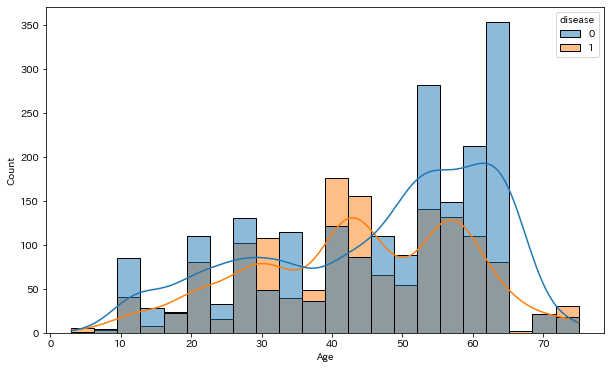

In [1106]:
sns.histplot(data=train, x='Age', hue='disease',kde=True)

<AxesSubplot:title={'center':'各特徴量と疾患の有無との相関'}>

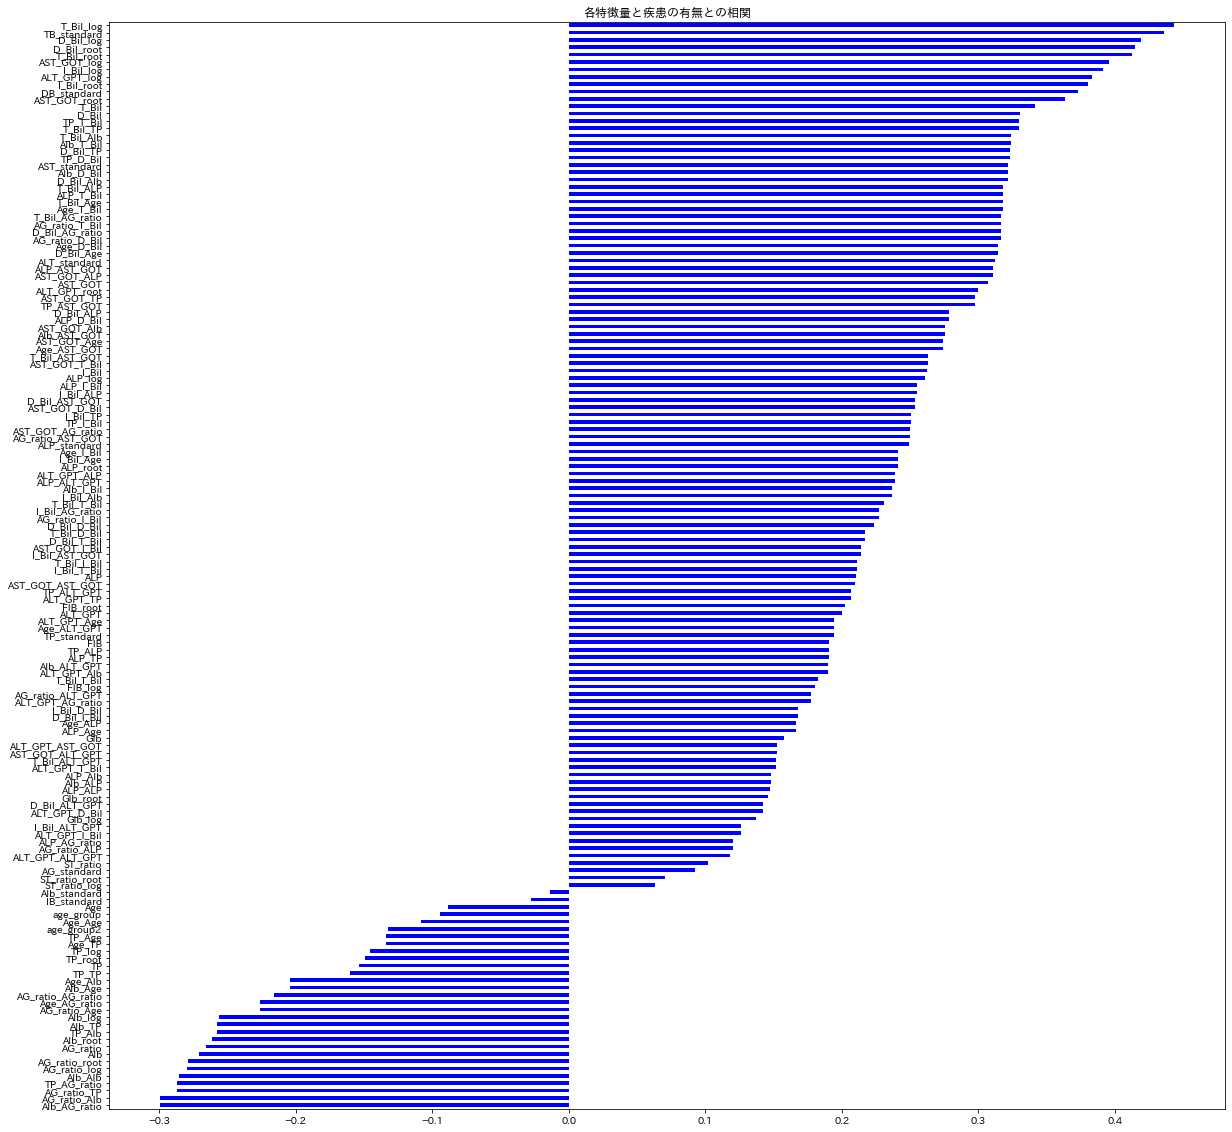

In [1124]:
df_corr = X.corrwith(y)
plt.figure(figsize=(20,20))
df_corr.sort_values().plot.barh(color='blue',title='各特徴量と疾患の有無との相関')

### XGBoost

[15:35:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric, task } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:35:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.69251	eval-logloss:0.69258
[1]	train-logloss:0.69190	eval-logloss:0.69204
[2]	train-logloss:0.69132	eval-logloss:0.69152
[3]	train-logloss:0.69075	eval-logloss:0.69103
[4]	train-logloss:0.69021	eval-logloss:0.69055
[5]	train-logloss:0.68969	eval-logloss:0.69010
[6]	train-logloss:0.68920	eval-logloss:0.68966
[7]	train-lo

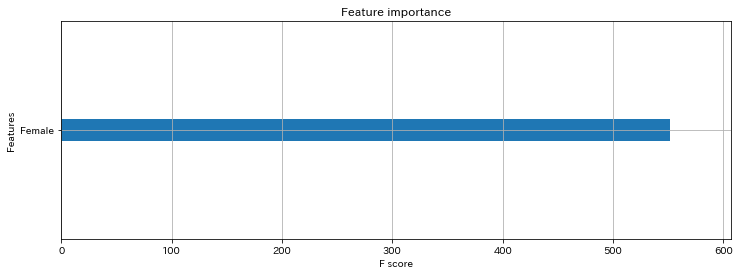

In [859]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 性別:カテゴリカル変数
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')
categorical_features = ['Gender']

# 学習データ
X = train.drop(['disease'], axis=1)
y = train['disease']

X = pd.get_dummies(X['Gender'])

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# 学習データを、学習用と検証用に分ける
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y_train)

# データを格納する
# 学習用
xgb_train = xgb.DMatrix(X_train, y_train)
                        #enable_categorical=True)
                        
# 検証用
xgb_eval = xgb.DMatrix(X_eval, y_eval)
                       #enable_categorical=True)
    
# テスト用
xgb_test = xgb.DMatrix(X_test, y_test)
                       

# パラメータを設定
params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
          'boosting_type': 'gbtree',        # 勾配ブースティング
          'objective': 'binary:logistic',      # 目的関数：二値分類
          'metric': 'auc',      # 分類モデルの性能を測る指標
          'learning_rate': 0.02,          # 学習率（初期値0.1）
          'max_depth':6,
          'eta':0.3
         }
watchlist = [(xgb_train, 'train'), (xgb_eval, 'eval')]
num_round = 1000       #設定した学習回数

# 学習
evaluation_results = {}                                     # 学習の経過を保存する箱
model = xgb.train(params,                                   # 上記で設定したパラメータ
                  xgb_train,                                # 使用するデータセット
                  num_round,
                  early_stopping_rounds=20,
                  evals=watchlist
                 )

# 最もスコアが良いときのラウンドを保存
optimum_boost_rounds = model.best_iteration

# テストデータで予測
y_pred = model.predict(xgb_test)
                       #ntree_limit=model.best_iteration)
#y_pred_max = np.argmax(y_pred, axis=0)

# Accuracy の計算
#accuracy = sum(y_test == y_pred_max) / len(y_test)
#print('accuracy:', accuracy)

# feature importanceを表示
#importance = pd.DataFrame(model.feature_importance(), index=X.columns, columns=['importance'])
#display(importance)

# 性能向上に寄与する度合いで重要度をプロットする
_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='cover',
                    show_values=False)
plt.show()


# 保存
model.save_model('model.txt')

# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


In [864]:
# テストデータで予測
df_test = test
df_test = pd.get_dummies(test['Gender'])
df_test = xgb.DMatrix(df_test)
y_pred = model.predict(df_test)

In [865]:
df_pred = pd.DataFrame(y_pred,index = range(3500,5000))
df_pred.to_csv("submit_xgb.csv",header=None)